# EDOS: métodos numéricos
Prof. Doherty Andrade 

## 1. Método de Euler
O Método de Euler é o mais simples método numérico, mas é também o
menos preciso. O método de Euler é um método de discretização onde
o domínio é dividido em $n$ partes iguais a $h$,  $h$ é chamado o
passo de discretização.

Se o domínio é o intervalo $[a,b]$, então discretizamos o domínio
tomando $(n+1)$ pontos igualmente espaçados do domínio dados por
$x_j= a+jh,j=0,1,\ldots, n$, em que $h= \frac{b-a}{n}$ é o passo
de discretização. Note que $x_0=a$ e $x_n=b$.

Consideremos o seguinte problema de valor inicial  $$y^\prime= f(x, y(x)),$$
com $y(x_0)= y_0$.

O método de Euler gera aproximações dadas por 
$$ y(x_{k+1}) = y_k + h f(x_k, y_k), k \geq 0. $$


Note que $y_{k+1}$ usa apenas o valor de $y_k$, isto é, a solução
aproximada $y_{k+1}$ para ser determinada necessita apenas $y_k$,
a aproximação imediatamente anterior. Estes métodos são chamads
de métodos de passo simples ou passo um.ples ou passo um.
les ou passo um.



## Exemplo: Considere o pvi dado por
$$y^\prime = x+y$$
com $$y(0)=1.$$
Observe que a solução exata é $y(x) = 2e^{x}-x-1$.

  x         y
0.0  1.000000
0.1  1.100000
0.2  1.220000
0.3  1.362000
0.4  1.528200
0.5  1.721020
0.6  1.943122
0.7  2.197434
0.8  2.487178
0.9  2.815895
1.0  3.187485
1.1  3.606233
1.2  4.076857
1.3  4.604542
1.4  5.194997
1.5  5.854496
1.6  6.589946
1.7  7.408941
1.8  8.319835
1.9  9.331818
2.0 10.455000


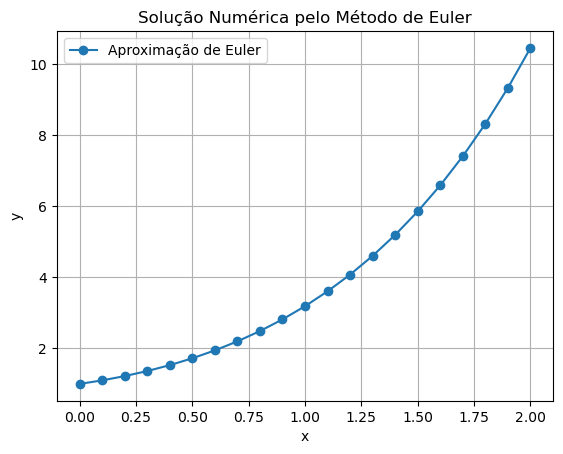

In [11]:
#euler com tabela
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def euler(f, x0, y0, h, n):
    """
    Método de Euler para resolver EDOs numericamente.
    
    Parâmetros:
        f  - Função f(x, y) que define a EDO dy/dx = f(x, y)
        x0 - Valor inicial de x
        y0 - Valor inicial de y
        h  - Passo do método
        n  - Número de passos
        
    Retorna:
        xs - Lista de valores de x
        ys - Lista de valores de y correspondentes
    """
    xs = np.zeros(n+1)
    ys = np.zeros(n+1)
    
    xs[0], ys[0] = x0, y0

    for i in range(n):
        ys[i+1] = ys[i] + h * f(xs[i], ys[i])
        xs[i+1] = xs[i] + h

    return xs, ys

# Definição da EDO: dy/dx = f(x, y)
def f(x, y):
    return x + y  # Exemplo: dy/dx = x + y

# Parâmetros iniciais
x0 = 0
y0 = 1  # y(0) = 1
h = 0.1  # Tamanho do passo
n = 20  # Número de passos

# Resolver a EDO usando Euler
xs, ys = euler(f, x0, y0, h, n)

# Criar um DataFrame com os valores calculados
df = pd.DataFrame({'x': xs, 'y': ys})

# Exibir a tabela
print(df.to_string(index=False))

# Plotar a solução
plt.plot(xs, ys, label="Aproximação de Euler", marker='o', linestyle='-')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Solução Numérica pelo Método de Euler")
plt.legend()
plt.grid()
plt.show()


## 2. O método de Runge-Kutta de ordem 2

Os métodos de Runge-Kutta de ordem 2 têm a forma geral dada por
$$
y_{n+1}=y_n+ha_1 f(x_{n},y_{n})+ha_2f(x_{n}+b_1h,y_{n}+b_2h
y^\prime$$

Tomando $a_1= _2= \frac{1}{2}$ e $b_1=b_2=1$, obtemos  o método de
Euler melhorado ou Heun,

$$ y_{k+1}=y_k+ \frac{h}{2} \left[f(x_{k},y_{k})+f(x_{k}+h,y_{k}+h
f(x_k,y_k))\right].$$ 
O exemplo é mesmo que o anterior.uation}


 x_k       y_k       K_1       K_2     Erro
 0.0  1.000000  1.000000  1.200000 0.000000
 0.1  1.120000  1.220000  1.442000 0.009658
 0.2  1.264200  1.464200  1.710620 0.021394
 0.3  1.435262  1.735262  2.008788 0.035544
 0.4  1.636141  2.036141  2.339755 0.052491
 0.5  1.870116  2.370116  2.707128 0.072674
 0.6  2.140829  2.740829  3.114912 0.096592
 0.7  2.452320  3.152320  3.567552 0.124815
 0.8  2.809076  3.609076  4.069983 0.157994
 0.9  3.216074  4.116074  4.627681 0.196868
 1.0  3.678842  4.678842  5.246726 0.242278
 1.1  4.203515  5.303515  5.933866 0.295183
 1.2  4.796901  5.996901  6.696591 0.356667
 1.3  5.466560  6.766560  7.543216 0.427967
 1.4  6.220882  7.620882  8.482970 0.510482
 1.5  7.069179  8.569179  9.526097 0.605801
 1.6  8.021789  9.621789 10.683968 0.715724
 1.7  9.090185 10.790185 11.969204 0.842291
 1.8 10.287106 12.087106 13.395816 0.987811
 1.9 11.626687 13.526687 14.979356 1.154899
 2.0 13.124623       NaN       NaN 1.346511


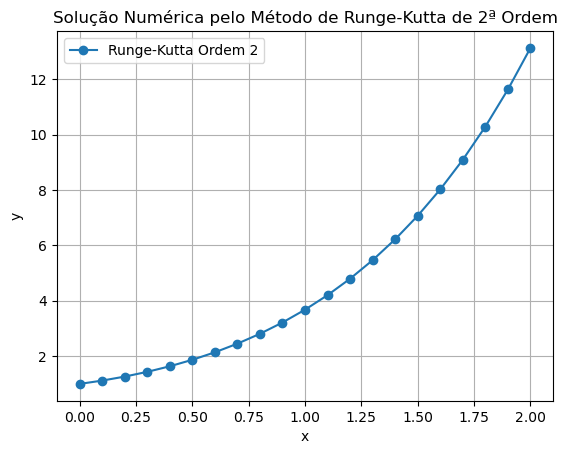

In [5]:
# runge - kutta 2 com tabela 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def runge_kutta2(f, x0, y0, h, n, exact_solution=None):
    """
    Método de Runge-Kutta de 2ª ordem para resolver EDOs numericamente.
    
    Parâmetros:
        f  - Função f(x, y) que define a EDO dy/dx = f(x, y)
        x0 - Valor inicial de x
        y0 - Valor inicial de y
        h  - Passo do método
        n  - Número de passos
        exact_solution - (Opcional) Função da solução exata para cálculo do erro
        
    Retorna:
        DataFrame contendo xs, ys, K1, K2 e erro (se exata for fornecida)
    """
    xs = np.zeros(n+1)
    ys = np.zeros(n+1)
    k1_vals = np.zeros(n)
    k2_vals = np.zeros(n)
    errors = np.zeros(n+1) if exact_solution else None
    
    xs[0], ys[0] = x0, y0
    if exact_solution:
        errors[0] = abs(ys[0] - exact_solution(xs[0]))

    for i in range(n):
        k1 = f(xs[i], ys[i])
        k2 = f(xs[i] + h, ys[i] + h * k1)
        ys[i+1] = ys[i] + (h * k2)
        xs[i+1] = xs[i] + h

        k1_vals[i] = k1
        k2_vals[i] = k2

        if exact_solution:
            errors[i+1] = abs(ys[i+1] - exact_solution(xs[i+1]))

    # Criar um DataFrame com os valores calculados
    data = {
        'x_k': xs,
        'y_k': ys,
        'K_1': np.append(k1_vals, np.nan),
        'K_2': np.append(k2_vals, np.nan),
    }
    if exact_solution:
        data['Erro'] = errors

    df = pd.DataFrame(data)

    return df, xs, ys

# Definição da EDO: dy/dx = f(x, y)
def f(x, y):
    return x + y  # Exemplo: dy/dx = x + y

# Definição da solução exata para erro (caso seja conhecida)
def exact_solution(x):
    return 2 * np.exp(x) - x - 1  # Solução exata da EDO dy/dx = x + y com y(0) = 1

# Parâmetros iniciais
x0 = 0
y0 = 1  # y(0) = 1
h = 0.1  # Tamanho do passo
n = 20  # Número de passos

# Resolver a EDO usando Runge-Kutta de 2ª ordem e calcular a tabela
df, xs, ys = runge_kutta2(f, x0, y0, h, n, exact_solution)

# Exibir a tabela
print(df.to_string(index=False))

# Plotar a solução
plt.plot(xs, ys, label="Runge-Kutta Ordem 2", marker='o', linestyle='-')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Solução Numérica pelo Método de Runge-Kutta de 2ª Ordem")
plt.legend()
plt.grid()
plt.show()


## 3. Método de Runge-Kutta de ordem 4: simplicidade + precisão + economia

O método de Runge-Kutta de quarta ordem é baseado na ideia de tomarmos combinações de $f(x,y)$ em vários pontos do
intervalo $x_k\leq x \leq x_{k+1}$ e arranjarmos os parâmetros para que 
a nossa aproximação de $y_{k+1}$ coincida com a expansão de
Taylor de ordem 4.

Resultando em:

$$ y_{k+1}= y_k+\frac{1}{6} \left( K_1 +2K_2
+2K_3+ K_4 \right)$$

onde 

$$K_1 = hf(x_{k}, y_k),$$
$$K_2 = hf(x_{k}+\frac{1}{2}h, y_k+ \frac{1}{2}K_1),$$
$$K_3 =  hf(x_{k}+\frac{1}{2}h, y_k+ \frac{1}{2}K_2),$$
$$K_4 = hf(x_{k}+h, y_k+ K_3).$$

 x_k       y_k       K_1       K_2       K_3       K_4         Erro
 0.0  1.000000  1.000000  1.100000  1.105000  1.210500 0.000000e+00
 0.1  1.110342  1.210342  1.320859  1.326385  1.442980 1.694846e-07
 0.2  1.242805  1.442805  1.564945  1.571052  1.699910 3.746190e-07
 0.3  1.399717  1.699717  1.834703  1.841452  1.983862 6.210269e-07
 0.4  1.583648  1.983648  2.132831  2.140290  2.297677 9.151212e-07
 0.5  1.797441  2.297441  2.462313  2.470557  2.644497 1.264207e-06
 0.6  2.044236  2.644236  2.826448  2.835558  3.027792 1.676597e-06
 0.7  2.327503  3.027503  3.228878  3.238947  3.451398 2.161747e-06
 0.8  2.651079  3.451079  3.673633  3.684761  3.919555 2.730400e-06
 0.9  3.019203  3.919203  4.165163  4.177461  4.436949 3.394754e-06
 1.0  3.436559  4.436559  4.708387  4.721979  5.008757 4.168648e-06
 1.1  3.908327  5.008327  5.308743  5.323764  5.640703 5.067775e-06
 1.2  4.440228  5.640228  5.972239  5.988840  6.339112 6.109917e-06
 1.3  5.038586  6.338586  6.705515  6.723862  7.

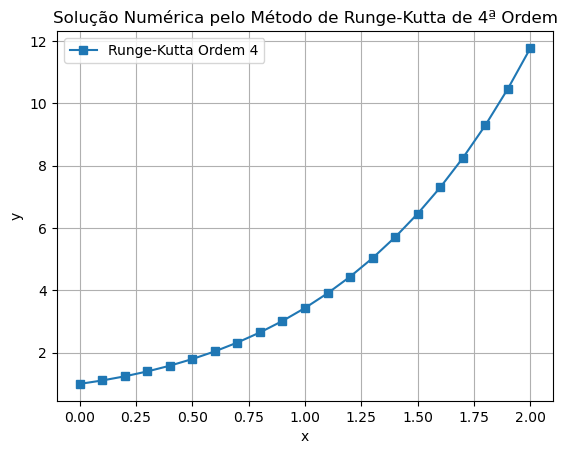

In [6]:
#runge-kutta 4 com tabela
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def runge_kutta4(f, x0, y0, h, n, exact_solution=None):
    """
    Método de Runge-Kutta de 4ª ordem para resolver EDOs numericamente.
    
    Parâmetros:
        f  - Função f(x, y) que define a EDO dy/dx = f(x, y)
        x0 - Valor inicial de x
        y0 - Valor inicial de y
        h  - Passo do método
        n  - Número de passos
        exact_solution - (Opcional) Função da solução exata para cálculo do erro
        
    Retorna:
        DataFrame contendo xs, ys, K1, K2, K3, K4 e erro (se exata for fornecida)
    """
    xs = np.zeros(n+1)
    ys = np.zeros(n+1)
    k1_vals = np.zeros(n)
    k2_vals = np.zeros(n)
    k3_vals = np.zeros(n)
    k4_vals = np.zeros(n)
    errors = np.zeros(n+1) if exact_solution else None
    
    xs[0], ys[0] = x0, y0
    if exact_solution:
        errors[0] = abs(ys[0] - exact_solution(xs[0]))

    for i in range(n):
        k1 = f(xs[i], ys[i])
        k2 = f(xs[i] + h/2, ys[i] + (h/2) * k1)
        k3 = f(xs[i] + h/2, ys[i] + (h/2) * k2)
        k4 = f(xs[i] + h, ys[i] + h * k3)
        
        ys[i+1] = ys[i] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
        xs[i+1] = xs[i] + h

        k1_vals[i] = k1
        k2_vals[i] = k2
        k3_vals[i] = k3
        k4_vals[i] = k4

        if exact_solution:
            errors[i+1] = abs(ys[i+1] - exact_solution(xs[i+1]))

    # Criar um DataFrame com os valores calculados
    data = {
        'x_k': xs,
        'y_k': ys,
        'K_1': np.append(k1_vals, np.nan),
        'K_2': np.append(k2_vals, np.nan),
        'K_3': np.append(k3_vals, np.nan),
        'K_4': np.append(k4_vals, np.nan),
    }
    if exact_solution:
        data['Erro'] = errors

    df = pd.DataFrame(data)

    return df, xs, ys

# Definição da EDO: dy/dx = f(x, y)
def f(x, y):
    return x + y  # Exemplo: dy/dx = x + y

# Definição da solução exata para erro (caso seja conhecida)
def exact_solution(x):
    return 2 * np.exp(x) - x - 1  # Solução exata da EDO dy/dx = x + y com y(0) = 1

# Parâmetros iniciais
x0 = 0
y0 = 1  # y(0) = 1
h = 0.1  # Tamanho do passo
n = 20  # Número de passos

# Resolver a EDO usando Runge-Kutta de 4ª ordem e calcular a tabela
df, xs, ys = runge_kutta4(f, x0, y0, h, n, exact_solution)

# Exibir a tabela
print(df.to_string(index=False))

# Plotar a solução
plt.plot(xs, ys, label="Runge-Kutta Ordem 4", marker='s', linestyle='-')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Solução Numérica pelo Método de Runge-Kutta de 4ª Ordem")
plt.legend()
plt.grid()
plt.show()


## 4. O método de Adams-Bashforth de 4a ordem 

é obtido aproximando $f$ por um polinômio de grau 3
interpolador em $x_i, x_{i-1},x_{i-2},x_{i-3}$ e usando a regra de
integração
$$\int_{x_i}^{x_{i+1}} f(x) dx \approx \frac{h}{24} \left[
55f(x_i)-59 f(x_{i-1})+37f(x_{i-2})-9f(x_{i-3})\right]$$ onde $h=
x_{i+1} -x_i$

O método é dado por:
$$y_{i+1}= y_i +  \frac{h}{24} \left[ 55f(x_i, y_i)-59
f(x_{i-1},y_{i-1})+37f(x_{i-2},y_{i-2})-9f(x_{i-3},y_{i-3})\right]$$
que é a fórmula do Método de Adams-Bashforth de  quarta ordem.

Observe que para determinar $y_4$ precisamos conhecer $y_0,y_1,
y_2,y_3$; como $y_0$ já é dado precisamos determinar os demais.
Fazemos isto usando um método numérico 
de passo simples.sso simples.

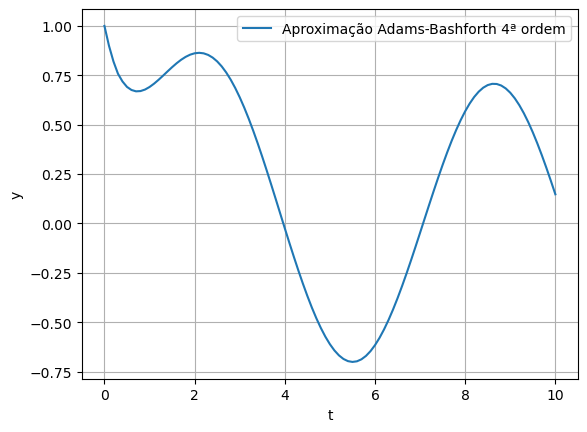

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    return -y + np.sin(t)  # Exemplo de EDO: y' = -y + sin(t)

def adams_bashforth_4(f, t0, y0, t_final, h):
    """
    Método de Adams-Bashforth de 4ª ordem para resolver EDOs.
    :param f: Função da EDO y' = f(t, y)
    :param t0: Tempo inicial
    :param y0: Condição inicial
    :param t_final: Tempo final
    :param h: Passo de integração
    :return: Arrays de tempos e soluções aproximadas
    """
    # Criando os valores de t
    t_values = np.arange(t0, t_final + h, h)
    n = len(t_values)
    y_values = np.zeros(n)
    y_values[0] = y0
    
    # Usar Runge-Kutta de ordem 4 para obter os primeiros 3 valores
    y_values[1] = y_values[0] + h * f(t_values[0], y_values[0])
    y_values[2] = y_values[1] + h * f(t_values[1], y_values[1])
    y_values[3] = y_values[2] + h * f(t_values[2], y_values[2])
    
    # Método de Adams-Bashforth de 4ª ordem
    for i in range(3, n - 1):
        y_values[i + 1] = y_values[i] + (h / 24) * (
            55 * f(t_values[i], y_values[i]) -
            59 * f(t_values[i - 1], y_values[i - 1]) +
            37 * f(t_values[i - 2], y_values[i - 2]) -
             9 * f(t_values[i - 3], y_values[i - 3])
        )
    
    return t_values, y_values

# Parâmetros de exemplo
t0 = 0
y0 = 1
t_final = 10
h = 0.1

# Resolvendo a EDO
t_values, y_values = adams_bashforth_4(f, t0, y0, t_final, h)

# Plotando o resultado
plt.plot(t_values, y_values, label='Aproximação Adams-Bashforth 4ª ordem')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


## 5. Método de Adams-Moulton

O método de Adams-Moulton de 4a.ordem, e passo 3, é um
método implícito dado por $$
y_{i+1}=y_i+\frac{h}{24}\left[9 f(x_{i+1},y_{i+1})+
19f(x_{i},y_{i})-5f(x_{i-1},y_{i-1})+ f(x_{i-2},y_{i-2})
\right]$$

Para aplicar um método implícito diretamente devemos resolver a equação. Isto não é óbvio que possa ser feito, portanto, temos que tomar cuidados. dos. cito}.


      x   y_aprox  Erro Absoluto
0   0.0  1.000000   0.000000e+00
1   0.1  1.110342   1.694846e-07
2   0.2  1.242805   3.746190e-07
3   0.3  1.399717   6.210269e-07
4   0.4  1.583649   3.145719e-07
5   0.5  1.797443   7.527723e-08
6   0.6  2.044238   5.461356e-07
7   0.7  2.327507   1.115782e-06
8   0.8  2.651084   1.799271e-06
9   0.9  3.019209   2.614175e-06
10  1.0  3.436567   3.580586e-06


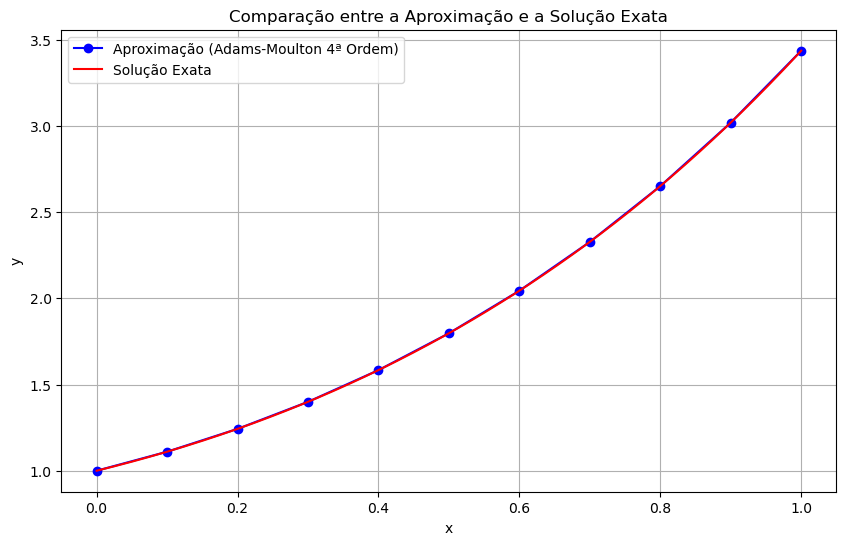

In [14]:
#adams-moulton
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def adams_moulton_4th_order(f, exact_solution, x0, y0, h, n):
    """
    Método de Adams-Moulton de 4ª ordem para resolver EDOs.
    
    Parâmetros:
        f  - Função f(x, y) que define a EDO dy/dx = f(x, y)
        exact_solution - Função exata y(x) para cálculo do erro
        x0 - Valor inicial de x
        y0 - Valor inicial de y
        h  - Passo do método
        n  - Número de passos
        
    Retorna:
        DataFrame contendo x, y_aproximado e erro absoluto.
    """
    # Validação dos parâmetros
    if h <= 0:
        raise ValueError("O passo h deve ser positivo.")
    if n <= 0:
        raise ValueError("O número de passos n deve ser positivo.")
    
    # Inicialização dos vetores
    xs = [x0]
    ys = [y0]
    errors = [0.0]  # Erro inicial é zero

    # Usando Runge-Kutta de 4ª ordem para obter os primeiros 4 pontos
    for i in range(3):
        x = xs[-1]
        y = ys[-1]
        
        k1 = f(x, y)
        k2 = f(x + h/2, y + (h/2) * k1)
        k3 = f(x + h/2, y + (h/2) * k2)
        k4 = f(x + h, y + h * k3)
        
        y_next = y + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
        x_next = x + h

        xs.append(x_next)
        ys.append(y_next)
        errors.append(abs(y_next - exact_solution(x_next)))

    # Método de Adams-Moulton de 4ª ordem
    for i in range(3, n):
        x = xs[-1]
        y = ys[-1]
        
        # Predição usando Adams-Bashforth de 4ª ordem
        y_pred = ys[-1] + (h/24) * (
            55 * f(xs[-1], ys[-1]) -
            59 * f(xs[-2], ys[-2]) +
            37 * f(xs[-3], ys[-3]) -
            9 * f(xs[-4], ys[-4])
        )
        
        # Correção usando Adams-Moulton de 4ª ordem
        y_next = ys[-1] + (h/24) * (
            9 * f(x + h, y_pred) +
            19 * f(xs[-1], ys[-1]) -
            5 * f(xs[-2], ys[-2]) +
            f(xs[-3], ys[-3])
        )
        
        x_next = x + h

        xs.append(x_next)
        ys.append(y_next)
        errors.append(abs(y_next - exact_solution(x_next)))

    # Criar DataFrame para exibição
    df = pd.DataFrame({
        'x': xs, 
        'y_aprox': ys, 
        'Erro Absoluto': errors
    })

    return df

def plot_results(df, exact_solution):
    """
    Plota os resultados aproximados e a solução exata.
    
    Parâmetros:
        df - DataFrame contendo os resultados do método de Adams-Moulton
        exact_solution - Função exata y(x) para comparação
    """
    plt.figure(figsize=(10, 6))
    plt.plot(df['x'], df['y_aprox'], 'bo-', label='Aproximação (Adams-Moulton 4ª Ordem)')
    x_exact = np.linspace(min(df['x']), max(df['x']), 400)
    y_exact = exact_solution(x_exact)
    plt.plot(x_exact, y_exact, 'r-', label='Solução Exata')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Comparação entre a Aproximação e a Solução Exata')
    plt.legend()
    plt.grid(True)
    plt.show()

# Definição da EDO: dy/dx = f(x, y)
def f(x, y):
    return x + y  # Exemplo: dy/dx = x + y

# Solução exata para comparação: y(x) = 2e^x - x - 1 (obtida via método analítico)
def exact_solution(x):
    return 2 * np.exp(x) - x - 1

# Parâmetros
x0 = 0
y0 = 1  # y(0) = 1
h = 0.1  # Tamanho do passo
n = 10   # Número de passos

# Gerar a tabela atualizada
df_am4 = adams_moulton_4th_order(f, exact_solution, x0, y0, h, n)

# Exibir a tabela
print(df_am4)

# Plotar os resultados
plot_results(df_am4, exact_solution)

## 6. Exemplos

      x      y_aprox  Erro Absoluto
0   0.0  1000.000000   0.000000e+00
1   0.1  1002.002001   2.273737e-13
2   0.2  1004.008011   4.547474e-13
3   0.3  1006.018036   7.958079e-13
4   0.4  1008.032086   1.136868e-13
5   0.5  1010.050167   1.136868e-12
6   0.6  1012.072289   1.818989e-12
7   0.7  1014.098459   2.728484e-12
8   0.8  1016.128685   3.524292e-12
9   0.9  1018.162976   4.433787e-12
10  1.0  1020.201340   5.229595e-12
11  1.1  1022.243784   6.139089e-12
12  1.2  1024.290318   7.048584e-12
13  1.3  1026.340948   7.958079e-12
14  1.4  1028.395684   8.640200e-12
15  1.5  1030.454534   9.549694e-12
16  1.6  1032.517505   1.068656e-11
17  1.7  1034.584607   1.136868e-11
18  1.8  1036.655846   1.227818e-11
19  1.9  1038.731233   1.341505e-11
20  2.0  1040.810774   1.432454e-11
21  2.1  1042.894479   1.523404e-11
22  2.2  1044.982355   1.614353e-11
23  2.3  1047.074411   1.682565e-11
24  2.4  1049.170655   1.773515e-11
25  2.5  1051.271096   1.864464e-11
26  2.6  1053.375743   1.978

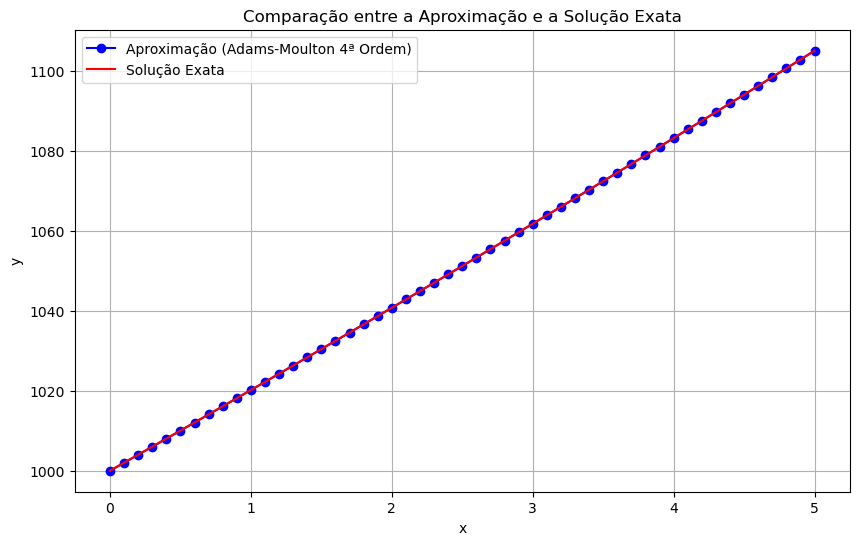

In [15]:
#crescimento populacional 
# Definição da EDO: dP/dt = kP
def f(t, P):
    k = 0.02  # Taxa de crescimento
    return k * P

# Solução exata: P(t) = P0 * e^(kt)
def exact_solution(t):
    P0 = 1000  # População inicial
    k = 0.02
    return P0 * np.exp(k * t)

# Parâmetros
t0 = 0
P0 = 1000
h = 0.1
n = 50

# Resolver usando Adams-Moulton
df_am4 = adams_moulton_4th_order(f, exact_solution, t0, P0, h, n)

# Exibir resultados
print(df_am4)
plot_results(df_am4, exact_solution)

          x    y_aprox  Erro Absoluto
0    0.0000  10.000000   0.000000e+00
1    0.0001   9.048375   8.196404e-07
2    0.0002   8.187309   1.483283e-06
3    0.0003   7.408184   2.013195e-06
4    0.0004   6.703199   1.277917e-06
..      ...        ...            ...
96   0.0096   0.000677   2.852201e-08
97   0.0097   0.000613   2.608704e-08
98   0.0098   0.000554   2.385721e-08
99   0.0099   0.000502   2.181553e-08
100  0.0100   0.000454   1.994639e-08

[101 rows x 3 columns]


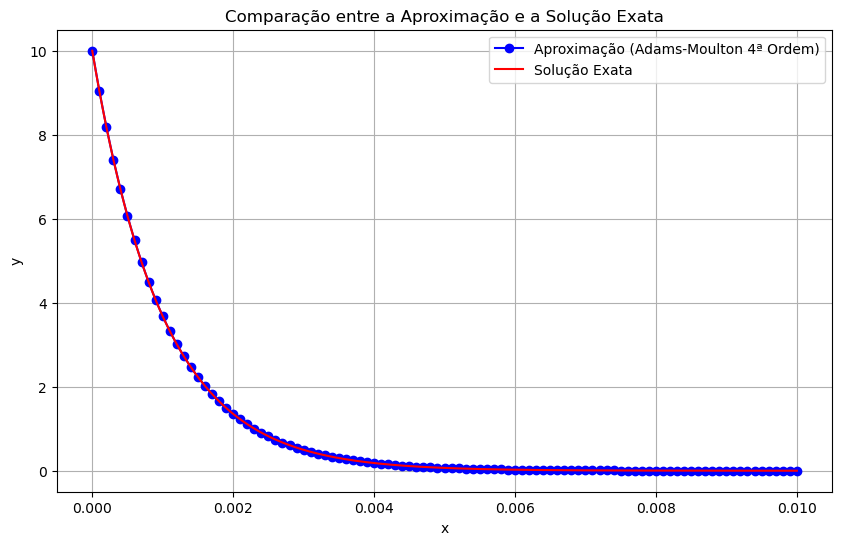

In [13]:
#circuito rc
# Definição da EDO: dV/dt = -V/(RC)
def f(t, V):
    R = 1000  # Resistência (Ohms)
    C = 1e-6  # Capacitância (Farads)
    return -V / (R * C)

# Solução exata: V(t) = V0 * e^(-t/(RC))
def exact_solution(t):
    V0 = 10  # Tensão inicial
    R = 1000
    C = 1e-6
    return V0 * np.exp(-t / (R * C))

# Parâmetros
t0 = 0
V0 = 10
h = 0.0001  # Passo pequeno devido à rápida descarga
n = 100

# Resolver usando Adams-Moulton
df_am4 = adams_moulton_4th_order(f, exact_solution, t0, V0, h, n)

# Exibir resultados
print(df_am4)
plot_results(df_am4, exact_solution)

## 7.  Pendulo simples Amortecido

# Introdução  

Um pêndulo simples consiste em uma massa $m$ presa a uma haste rígida de comprimento $L$, que oscila sob a ação da gravidade. Quando há amortecimento (por exemplo, devido à resistência do ar), a amplitude das oscilações diminui ao longo do tempo.  

## Equação Diferencial  

A equação diferencial que descreve o movimento do pêndulo amortecido é:  

$$
\frac{d^2 \theta}{dt^2} + \frac{b}{m} \frac{d\theta}{dt} + \frac{g}{L} \sin(\theta) = 0
$$

onde:

- $ \theta(t) $ é o ângulo do pêndulo em relação à posição de equilíbrio no tempo $ t $;
- $ b $ é o coeficiente de amortecimento;
- $ m $ é a massa do pêndulo;
- $ g $ é a aceleração devido à gravidade ($ \approx 9.81 $ m/s$^2$);
- $ L $ é o comprimento da haste.

## Transformação em um Sistema de EDOs  

Para resolver numericamente, transformamos a equação diferencial de segunda ordem em um sistema de duas equações diferenciais de primeira ordem. Definimos:

$$
\omega = \frac{d\theta}{dt}
$$

onde $ \omega(t) $ representa a velocidade angular.  

O sistema de equações diferenciais resultante é:

$$
\frac{d\theta}{dt} = \omega
$$

$$
\frac{d\omega}{dt} = -\frac{b}{m} \omega - \frac{g}{L} \sin(\theta)
$$

## Solução Analítica para Pequenos Ângulos  

Para pequenos ângulos ($ \theta \approx 0 $), podemos aproximar $ \sin(\theta) \approx \theta $, e a equação diferencial se torna linear. Neste caso, a solução analítica descreve uma oscilação amortecida:

$$
\theta(t) = \theta_0 e^{-\frac{b}{2m}t} \cos \left( \sqrt{\frac{g}{L} - \left(\frac{b}{2m} \right)^2} t \right)
$$

No entanto, para ângulos grandes, a solução exata não pode ser obtida diretamente e geralmente requer métodos numéricos.

## Aplicação  

Para um exemplo prático, consideremos os seguintes valores:

- $ m = 1 $ kg;
- $ L = 1 $ m;
- $ b = 0.5 $ kg/s;
- $ g = 9.81 $ m/s$^2$;
- $ \theta(0) = \frac{\pi}{4} $ rad (ângulo inicial);
- $ \omega(0) = 0 $ rad/s (velocidade angular inicial).

Com esses valores, podemos resolver numericamente as equações diferenciais para analisar o comportamento do pêndulo amortecido ao longo do tempo.
sar o comportamento do pêndulo amortecido ao longo do tempo.
   longo do tempo.

\end{document}



EDO:

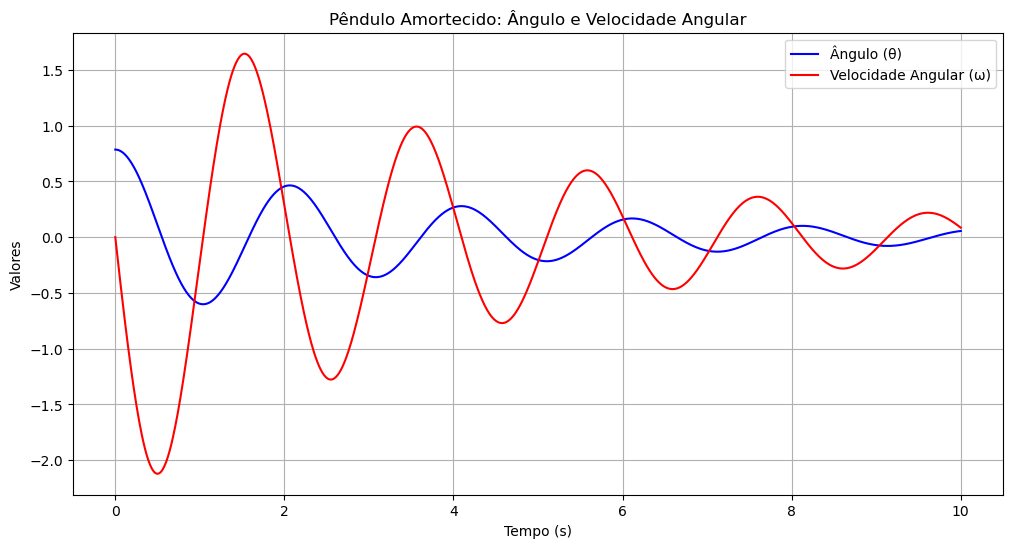

In [14]:
#pendulo simples amortecido
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def runge_kutta4_system(f, t0, y0, h, n):
    """
    Método de Runge-Kutta de 4ª ordem para sistemas de EDOs.
    
    Parâmetros:
        f  - Função que define o sistema de EDOs (deve retornar um array)
        t0 - Valor inicial de t
        y0 - Valores iniciais de y (array)
        h  - Passo do método
        n  - Número de passos
        
    Retorna:
        ts - Valores de t
        ys - Valores de y (array de arrays)
    """
    ts = [t0]
    ys = [y0]

    for i in range(n):
        t = ts[-1]
        y = ys[-1]
        
        k1 = f(t, y)
        k2 = f(t + h/2, y + (h/2) * k1)
        k3 = f(t + h/2, y + (h/2) * k2)
        k4 = f(t + h, y + h * k3)
        
        y_next = y + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
        t_next = t + h

        ts.append(t_next)
        ys.append(y_next)

    return np.array(ts), np.array(ys)

# Definição do sistema de EDOs para o pêndulo amortecido
def f(t, y):
    theta, omega = y
    b = 0.5  # Coeficiente de amortecimento
    m = 1    # Massa
    g = 9.81 # Aceleração da gravidade
    L = 1    # Comprimento da haste
    dtheta_dt = omega
    domega_dt = -(b/m) * omega - (g/L) * np.sin(theta)
    return np.array([dtheta_dt, domega_dt])

# Parâmetros
t0 = 0
y0 = np.array([np.pi/4, 0])  # Ângulo inicial e velocidade angular inicial
h = 0.01  # Passo
n = 1000  # Número de passos

# Resolver o sistema
ts, ys = runge_kutta4_system(f, t0, y0, h, n)

# Extrair theta e omega
thetas = ys[:, 0]
omegas = ys[:, 1]

# Plotar os resultados
plt.figure(figsize=(12, 6))
plt.plot(ts, thetas, 'b-', label='Ângulo (θ)')
plt.plot(ts, omegas, 'r-', label='Velocidade Angular (ω)')
plt.xlabel('Tempo (s)')
plt.ylabel('Valores')
plt.title('Pêndulo Amortecido: Ângulo e Velocidade Angular')
plt.legend()
plt.grid(True)
plt.show()

## 8. Méto de Runge-Kutta para sistemas de edos 2 por 2

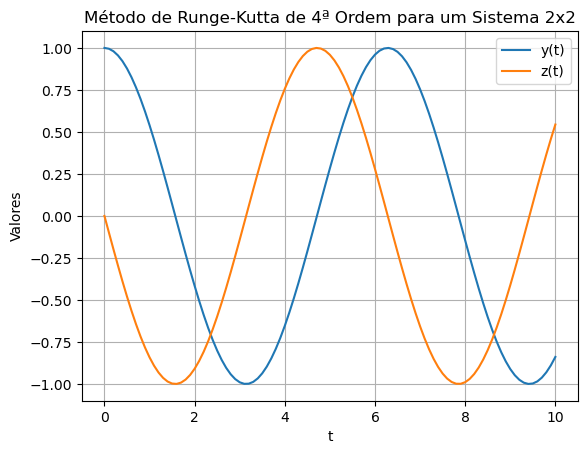

In [15]:
# runge-kutta de ordem 4 para sistemas 2 por 2
import numpy as np
import matplotlib.pyplot as plt

def runge_kutta_4_system(f1, f2, t0, y0, z0, t_final, h):
    """
    Método de Runge-Kutta de quarta ordem para um sistema de EDOs de primeira ordem.
    
    Parâmetros:
    f1, f2: Funções que representam o sistema de equações diferenciais.
    t0: Tempo inicial.
    y0, z0: Condições iniciais para y e z.
    t_final: Tempo final.
    h: Passo de integração.
    
    Retorna:
    t_vals: Lista dos valores de t.
    y_vals, z_vals: Listas dos valores das soluções y e z.
    """
    
    t_vals = np.arange(t0, t_final + h, h)
    y_vals = np.zeros_like(t_vals)
    z_vals = np.zeros_like(t_vals)
    
    y_vals[0] = y0
    z_vals[0] = z0
    
    for i in range(len(t_vals) - 1):
        t = t_vals[i]
        y = y_vals[i]
        z = z_vals[i]
        
        k1_y = h * f1(t, y, z)
        k1_z = h * f2(t, y, z)
        
        k2_y = h * f1(t + h/2, y + k1_y/2, z + k1_z/2)
        k2_z = h * f2(t + h/2, y + k1_y/2, z + k1_z/2)
        
        k3_y = h * f1(t + h/2, y + k2_y/2, z + k2_z/2)
        k3_z = h * f2(t + h/2, y + k2_y/2, z + k2_z/2)
        
        k4_y = h * f1(t + h, y + k3_y, z + k3_z)
        k4_z = h * f2(t + h, y + k3_y, z + k3_z)
        
        y_vals[i+1] = y + (k1_y + 2*k2_y + 2*k3_y + k4_y) / 6
        z_vals[i+1] = z + (k1_z + 2*k2_z + 2*k3_z + k4_z) / 6
    
    return t_vals, y_vals, z_vals

# Definição do sistema de EDOs
def f1(t, y, z):
    return z  # Exemplo: dy/dt = z

def f2(t, y, z):
    return -y  # Exemplo: dz/dt = -y

# Parâmetros
t0 = 0
y0 = 1
z0 = 0
t_final = 10
h = 0.1

# Resolvendo o sistema
t_vals, y_vals, z_vals = runge_kutta_4_system(f1, f2, t0, y0, z0, t_final, h)

# Plotando os resultados
plt.plot(t_vals, y_vals, label='y(t)')
plt.plot(t_vals, z_vals, label='z(t)')
plt.xlabel('t')
plt.ylabel('Valores')
plt.legend()
plt.grid()
plt.title('Método de Runge-Kutta de 4ª Ordem para um Sistema 2x2')
plt.show()


## 9. Modelo presa-predador

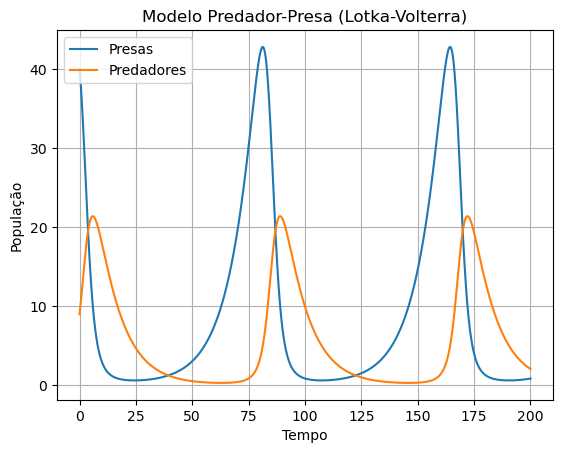

In [16]:
#predador presa
import numpy as np
import matplotlib.pyplot as plt

def runge_kutta_4_system(f1, f2, t0, y0, z0, t_final, h):
    """
    Método de Runge-Kutta de quarta ordem para um sistema de EDOs de primeira ordem.
    
    Parâmetros:
    f1, f2: Funções que representam o sistema de equações diferenciais.
    t0: Tempo inicial.
    y0, z0: Condições iniciais para y e z.
    t_final: Tempo final.
    h: Passo de integração.
    
    Retorna:
    t_vals: Lista dos valores de t.
    y_vals, z_vals: Listas dos valores das soluções y e z.
    """
    
    t_vals = np.arange(t0, t_final + h, h)
    y_vals = np.zeros_like(t_vals)
    z_vals = np.zeros_like(t_vals)
    
    y_vals[0] = y0
    z_vals[0] = z0
    
    for i in range(len(t_vals) - 1):
        t = t_vals[i]
        y = y_vals[i]
        z = z_vals[i]
        
        k1_y = h * f1(t, y, z)
        k1_z = h * f2(t, y, z)
        
        k2_y = h * f1(t + h/2, y + k1_y/2, z + k1_z/2)
        k2_z = h * f2(t + h/2, y + k1_y/2, z + k1_z/2)
        
        k3_y = h * f1(t + h/2, y + k2_y/2, z + k2_z/2)
        k3_z = h * f2(t + h/2, y + k2_y/2, z + k2_z/2)
        
        k4_y = h * f1(t + h, y + k3_y, z + k3_z)
        k4_z = h * f2(t + h, y + k3_y, z + k3_z)
        
        y_vals[i+1] = y + (k1_y + 2*k2_y + 2*k3_y + k4_y) / 6
        z_vals[i+1] = z + (k1_z + 2*k2_z + 2*k3_z + k4_z) / 6
    
    return t_vals, y_vals, z_vals

# Modelo Predador-Presa
def f1(t, y, z):
    alpha = 0.1  # Taxa de crescimento da presa
    beta = 0.02  # Taxa de predação
    return alpha * y - beta * y * z

def f2(t, y, z):
    delta = 0.01  # Taxa de reprodução do predador
    gamma = 0.1   # Taxa de mortalidade do predador
    return delta * y * z - gamma * z

# Parâmetros
t0 = 0
y0 = 40  # População inicial de presas
z0 = 9   # População inicial de predadores
t_final = 200
h = 0.1

# Resolvendo o sistema
t_vals, y_vals, z_vals = runge_kutta_4_system(f1, f2, t0, y0, z0, t_final, h)

# Plotando os resultados
plt.plot(t_vals, y_vals, label='Presas')
plt.plot(t_vals, z_vals, label='Predadores')
plt.xlabel('Tempo')
plt.ylabel('População')
plt.legend()
plt.grid()
plt.title('Modelo Predador-Presa (Lotka-Volterra)')
plt.show()


## 10.  edo diretamente do Python

Veja os exemplos em que usamos sp.dsolve, solve_ivp, 


Solução simbólica: Eq(y(t), C1*exp(-t) + sin(t)/2 - cos(t)/2)


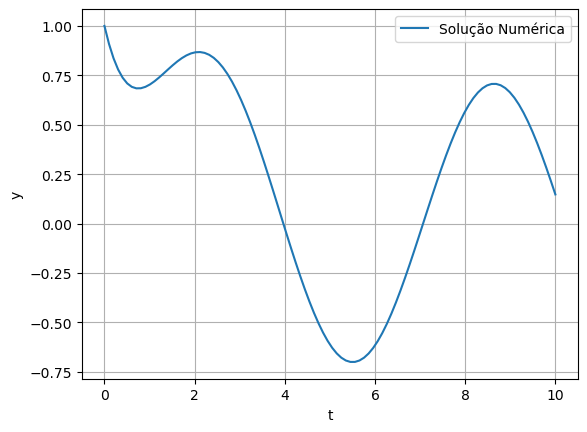

In [18]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Resolvendo simbolicamente uma EDO com SymPy
t = sp.Symbol('t')
y = sp.Function('y')(t)
deq = sp.Eq(y.diff(t), -y + sp.sin(t))  # y' = -y + sin(t)
sol = sp.dsolve(deq, y)
print("Solução simbólica:", sol)

# Resolvendo numericamente com scipy.integrate.solve_ivp
def f(t, y):
    return -y + np.sin(t)

t_span = (0, 10)  # Intervalo de tempo
y0 = [1]  # Condição inicial
t_eval = np.linspace(0, 10, 100)  # Pontos para avaliar a solução

sol_numeric = solve_ivp(f, t_span, y0, t_eval=t_eval, method='RK45')

# Plotando a solução numérica
plt.plot(sol_numeric.t, sol_numeric.y[0], label='Solução Numérica')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()



Mais um exemplo

Solução simbólica: Eq(y(t), C1*exp(-t) + sin(t)/2 - cos(t)/2)


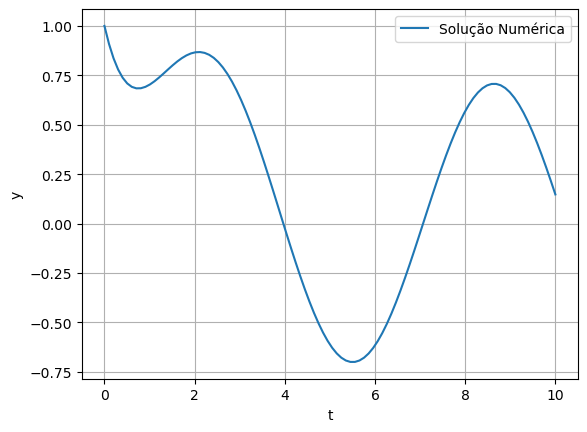

Solução simbólica da EDO de segunda ordem: Eq(u(x), (C1 + x*(C2 + x/2))*exp(x))


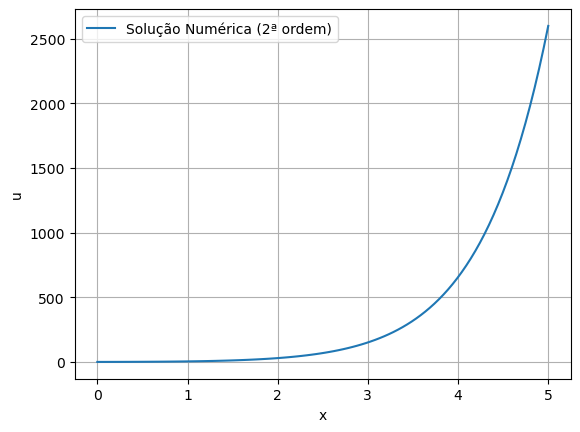

In [20]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Resolvendo simbolicamente uma EDO com SymPy
t = sp.Symbol('t')
y = sp.Function('y')(t)
deq = sp.Eq(y.diff(t), -y + sp.sin(t))  # y' = -y + sin(t)
sol = sp.dsolve(deq, y)
print("Solução simbólica:", sol)

# Resolvendo numericamente com scipy.integrate.solve_ivp
def f(t, y):
    return -y + np.sin(t)

t_span = (0, 10)  # Intervalo de tempo
y0 = [1]  # Condição inicial
t_eval = np.linspace(0, 10, 100)  # Pontos para avaliar a solução

sol_numeric = solve_ivp(f, t_span, y0, t_eval=t_eval, method='RK45')

# Plotando a solução numérica
plt.plot(sol_numeric.t, sol_numeric.y[0], label='Solução Numérica')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Novo exemplo: EDO de segunda ordem
x = sp.Symbol('x')
u = sp.Function('u')(x)
deq2 = sp.Eq(u.diff(x, x) - 2*u.diff(x) + u, sp.exp(x))  # u'' - 2u' + u = e^x
sol2 = sp.dsolve(deq2, u)
print("Solução simbólica da EDO de segunda ordem:", sol2)

# Resolvendo numericamente com solve_ivp
def f2(x, U):
    return [U[1], 2*U[1] - U[0] + np.exp(x)]

x_span = (0, 5)  # Intervalo de solução
U0 = [0, 1]  # Condições iniciais: u(0) = 0, u'(0) = 1
x_eval = np.linspace(0, 5, 100)

sol_numeric2 = solve_ivp(f2, x_span, U0, t_eval=x_eval, method='RK45')

# Plotando a solução numérica
plt.plot(sol_numeric2.t, sol_numeric2.y[0], label='Solução Numérica (2ª ordem)')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.grid()
plt.show()



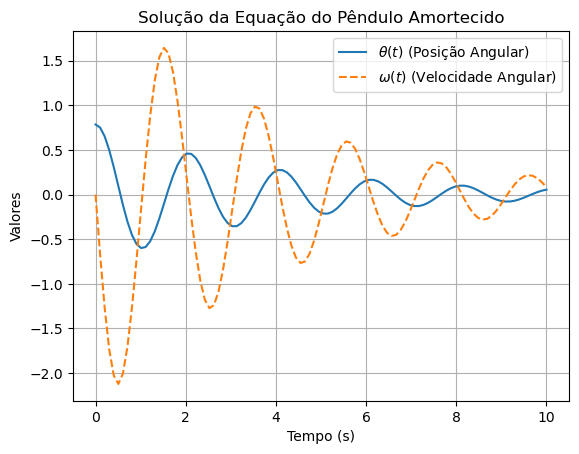

In [21]:
# pendulo
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Sistema de equações diferenciais
def pendulo(t, y):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -0.5 * omega - 9.81 * np.sin(theta)
    return [dtheta_dt, domega_dt]

# Intervalo de tempo
t_span = (0, 10)
t_eval = np.linspace(0, 10, 100)

# Condições iniciais: theta(0) = pi/4, omega(0) = 0
y0 = [np.pi/4, 0]

# Resolver EDO usando solve_ivp
sol = solve_ivp(pendulo, t_span, y0, t_eval=t_eval, method='RK45')

# Plotar a solução
plt.plot(sol.t, sol.y[0], label=r"$\theta(t)$ (Posição Angular)")
plt.plot(sol.t, sol.y[1], label=r"$\omega(t)$ (Velocidade Angular)", linestyle="dashed")
plt.xlabel("Tempo (s)")
plt.ylabel("Valores")
plt.title("Solução da Equação do Pêndulo Amortecido")
plt.legend()
plt.grid()
plt.show()
